In [ ]:
# importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection and processing

In [ ]:
# loading the dataset to the pandas dataframe
loan_data = pd.read_csv('/content/dataset(loan).csv')

In [ ]:
# printing the first five row
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#printing last five rows
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
type(loan_data)

pandas.core.frame.DataFrame

In [ ]:
# statistical measures
loan_data.shape

(614, 13)

In [ ]:
# some mathmatical property
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# checking the missing value
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# droping the missing value
loan_data = loan_data.dropna()

In [ ]:
# again checking for missing value
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# LABEL ENCODING
loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace = True)

<ipython-input-32-4569e5743a67>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace = True)


In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
#	Dependents column
loan_data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [ ]:
# we have to change 3+ value into 4
loan_data.replace({"Dependents":{'3+':4}},inplace = True)

In [ ]:
# we have to change in married column : yes - 1 ; no - 0
# and gender : male - 1, female - 0
loan_data.replace({"Married":{'Yes':1,'No':0},"Gender":{'Male':1,'Female':0}},inplace = True)

<ipython-input-47-ea97b936608b>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({"Married":{'Yes':1,'No':0},"Gender":{'Male':1,'Female':0}},inplace = True)


In [ ]:
# now we are changing in Education column :
# graduate - 1
# non-graduate - 0
loan_data.replace({"Education":{'Graduate':1,'Not Graduate':0}},inplace = True)

<ipython-input-45-1099858b2440>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({"Education":{'Graduate':1,'Not Graduate':0}},inplace = True)


In [ ]:
loan_data.replace({"Self_Employed":{'Yes':1,'No':0},"Property_Area":{'Rural':0,'Urban':2,'Semiurban':1}},inplace = True)

<ipython-input-49-266e6e3ca9b4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({"Self_Employed":{'Yes':1,'No':0},"Property_Area":{'Rural':0,'Urban':2,'Semiurban':1}},inplace = True)


In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# again printing the dependent values
loan_data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


**Data Visualization**

checking the relation of one feature with another

<Axes: xlabel='Education', ylabel='count'>

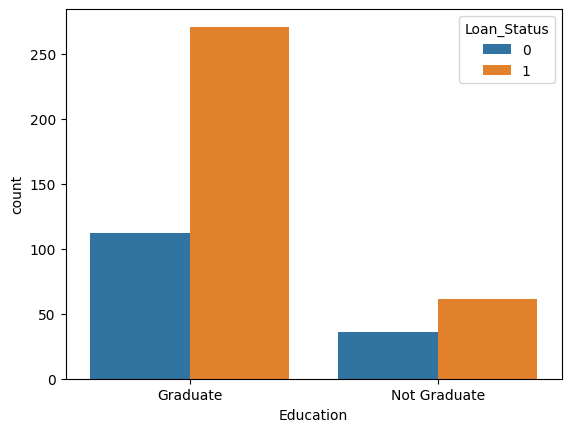

In [ ]:
# checking for the education and loan status
sns.countplot(x = 'Education',hue = 'Loan_Status',data= loan_data)

# 0 - loan not approved
# 1 - loan approved

<Axes: xlabel='Married', ylabel='count'>

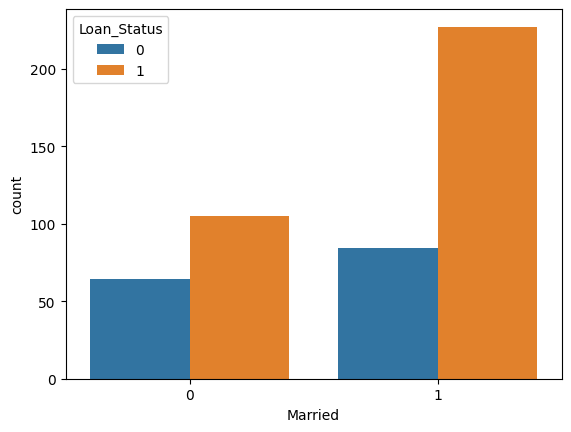

In [ ]:
# checking between marital status and loan status
sns.countplot(x = "Married", hue = "Loan_Status",data = loan_data)

<Axes: xlabel='Gender', ylabel='count'>

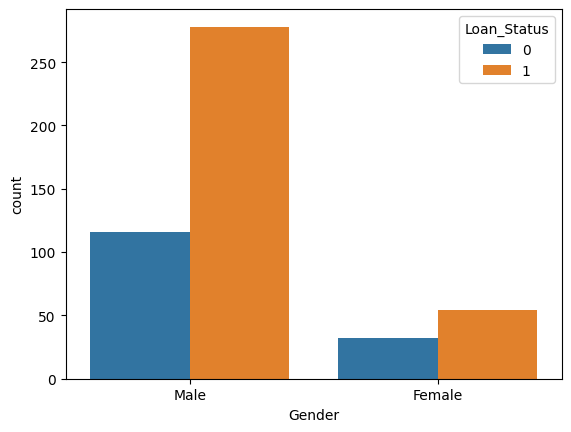

In [ ]:
# between gender and loan_status
sns.countplot(x = "Gender", hue = "Loan_Status",data = loan_data)

Separating data (features) and targate

In [ ]:
# removing the loan id column
label = loan_data.drop(columns = 'Loan_ID',axis = 1);

In [ ]:
print(label)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
# now separating the other features and targate column
features = label.drop(columns = 'Loan_Status',axis = 1)
targate = label['Loan_Status']

In [ ]:
print(features)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
print(targate)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


**Train Test Split**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(features,targate,test_size = 0.1,stratify = targate,random_state =2)

In [ ]:
print(features.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model:

**Support vector machine model**

In [ ]:
classifier = svm.SVC(kernel= 'linear')

In [ ]:
# training the support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

**Model Evaluation**

In [ ]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print(training_data_accuracy)

0.7986111111111112


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print(test_data_accuracy)

0.8333333333333334
